In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics




In [2]:
# importing csv file and filling out missing values
missing_values=["?"]
df = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv',na_values=missing_values)
df

C:\Users\canda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


<AxesSubplot:>

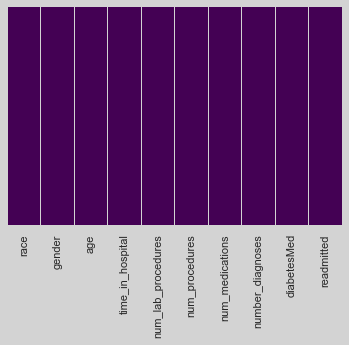

In [64]:
#EDA
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='number_diagnoses', ylabel='time_in_hospital'>

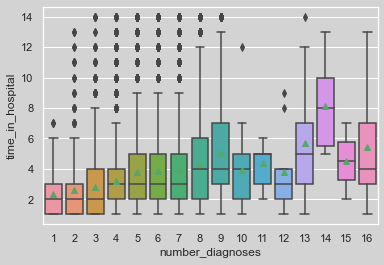

In [65]:
#EDA

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'},)
sns.boxplot(x='number_diagnoses', y='time_in_hospital', data=df,showmeans=True)




<AxesSubplot:xlabel='readmitted', ylabel='count'>

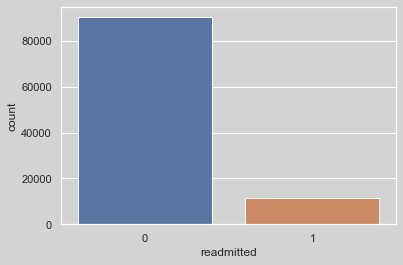

In [63]:
#EDA
sns.countplot(data=df,x=df['readmitted'])


In [17]:
#data cleaning
df.drop(['encounter_id','patient_nbr','payer_code','medical_specialty','weight','diag_1','diag_2','diag_3'],axis=1,inplace=True)

KeyError: "['encounter_id' 'patient_nbr' 'payer_code' 'medical_specialty' 'weight'\n 'diag_1' 'diag_2' 'diag_3'] not found in axis"

In [19]:
#changing  Unknown/Invalid to Female
df['gender'].replace({'Unknown/Invalid': 'Female'}, regex=True,inplace=True)


In [20]:
#changing race to other
df['race'].fillna('Other',inplace=True)



In [21]:
#changing race to numeric values
df.replace({'Caucasian':'1'},regex=True, inplace=True)
df.replace({'AfricanAmerican':'2'}, regex=True, inplace=True)
df.replace({'Hispanic': '3'},regex=True, inplace=True)
df.replace({'Asian':'4'},regex=True,inplace=True)
df.replace({'Other':'5'},regex=True,inplace=True)

In [22]:
#changing age to numeric values
df.replace({'\[0-10\)':'0'}, regex=True, inplace=True)
df.replace({'\[10-20\)':'1'}, regex=True, inplace=True)
df.replace({'\[20-30\)':'2'}, regex=True, inplace=True)
df.replace({'\[30-40\)':'3'}, regex=True, inplace=True)
df.replace({'\[40-50\)':'4'}, regex=True, inplace=True)
df.replace({'\[50-60\)':'5'}, regex=True, inplace=True)
df.replace({'\[60-70\)':'6'}, regex=True, inplace=True)
df.replace({'\[70-80\)':'7'}, regex=True, inplace=True)
df.replace({'\[80-90\)':'8'}, regex=True, inplace=True)
df.replace({'\[90-100\)':'10'}, regex=True, inplace=True)

In [23]:
#changing gender,readmitted and diabetes columns to numeric values
df['gender'].replace({'Female':'0'}, regex=True, inplace=True)
df['gender'].replace({'Male':'1'}, regex=True, inplace=True)

df['diabetesMed'].replace({'Yes':'1'}, regex=True, inplace=True)
df['diabetesMed'].replace({'No':'0'}, regex=True, inplace=True)


df['readmitted'].replace({'NO':'0'}, regex=True, inplace=True)
df['readmitted'].replace({'<30':'1'}, regex=True, inplace=True)
df['readmitted'].replace({'>30':'0'}, regex=True, inplace=True)




In [24]:
#dropping cloumns
df.drop(['admission_type_id','discharge_disposition_id','admission_source_id','number_outpatient','number_emergency','number_inpatient','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide'],axis=1,inplace=True)
df.drop(['insulin'],axis=1,inplace=True)
df.drop(['glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone'],axis=1,inplace=True)



KeyError: "['admission_type_id' 'discharge_disposition_id' 'admission_source_id'\n 'number_outpatient' 'number_emergency' 'number_inpatient' 'max_glu_serum'\n 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'] not found in axis"

In [25]:
#dropping more columns
df.drop(['chlorpropamide','acetohexamide', 'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True)

KeyError: "['chlorpropamide' 'acetohexamide' 'tolbutamide' 'acarbose' 'miglitol'\n 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'glyburide-metformin'\n 'glipizide-metformin' 'glimepiride-pioglitazone'\n 'metformin-rosiglitazone' 'metformin-pioglitazone'] not found in axis"

In [26]:
#dropping more columns
df.drop(['change'],axis=1, inplace=True)


KeyError: "['change'] not found in axis"

In [40]:
#Logistic Regression

ds=df
#y=ds['readmitted']
#x=ds[['race','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','diabetesMed','gender']]



In [42]:
X_train, X_test, y_train, y_test= train_test_split(ds.drop('readmitted', axis=1), ds['readmitted'],test_size=0.3, random_state=101) 

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:

logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [50]:

predict = logmodel.predict(X_test)

In [51]:
#printing classification report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.51      0.65     27141
           1       0.13      0.57      0.21      3389

    accuracy                           0.52     30530
   macro avg       0.52      0.54      0.43     30530
weighted avg       0.82      0.52      0.60     30530



In [52]:
#Confusion matrix
print(confusion_matrix(y_test, predict))

[[13820 13321]
 [ 1449  1940]]


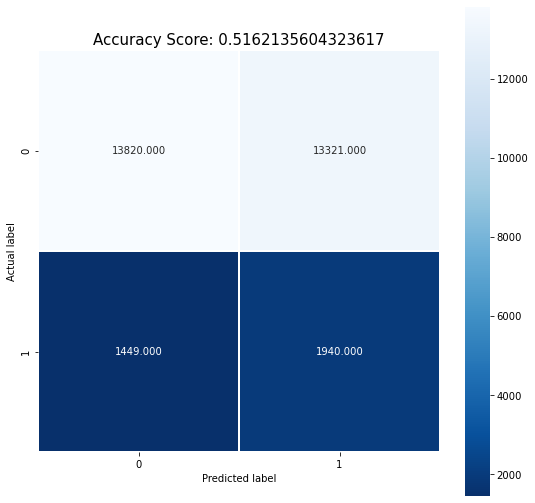

In [53]:
#Accuracy Score Figure
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

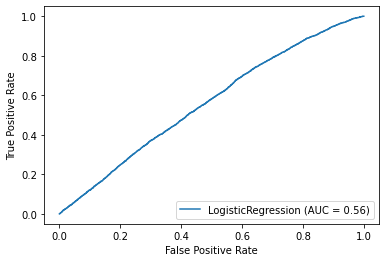

In [54]:
# metrics curve
metrics.plot_roc_curve(logmodel, X_test, y_test)  

conclusion

